## Import modules

In [4]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import matplotlib.pyplot as plt

# add the magic command to keep charts inline



## Set the spatially enabled dataframe and filter data

In [5]:
sedf = pd.DataFrame.spatial.from_featureclass(r'C:\Users\bputra\OneDrive - ESRI Indonesia\PT ESRI Indonesia\Research\code-script\22_arcgis_for_python_study\belajar_arcgis_for_python\VisualPythonAPI\VisualPythonAPI\FirePoints.gdb\FireEvents')

In [6]:
sedf

,OBJECTID,FireId,Org,UnitName,FireCode,FIRE_NAME,CauseCat,Owner,LatNAD83,LongNAD83,StartDate,InitAtDate,ContrDate,ContrAcres,OutDate,CompCode,State,Date_Start,SHAPE
0,1,685899,BIA,Alaska Regional Office,JN1K,Dillingham,Human,2,59.05,-158.45,20150415,20150415,20150415,2.0,20150415,Complete,Alaska,2015-04-15,"{""x"": -158.44999999980013, ""y"": 59.04999999990..."
1,2,685868,BIA,Alaska Regional Office,JQD5,Bolgen Creek,Human,2,65.7144,-144.3067,20150516,20150516,20150525,535.4,20150722,Complete,Alaska,2015-05-16,"{""x"": -144.30669999980512, ""y"": 65.71439999956..."
2,3,685869,BIA,Alaska Regional Office,JRQ6,Innoko River,Natural,2,62.9681,-159.3672,20150603,20150603,20150621,8661.0,20150621,Complete,Alaska,2015-06-03,"{""x"": -159.36719999978013, ""y"": 62.96810000031..."
3,4,685870,BIA,Alaska Regional Office,JT1V,South Fork,Natural,2,64.7153,-158.2644,20150622,20150623,20150629,4692.5,20150629,Complete,Alaska,2015-06-22,"{""x"": -158.2643999996602, ""y"": 64.715299999895..."
4,5,685891,BIA,Alaska Regional Office,JW1W,Kwethluk Airport,Human,2,60.77,-161.43,20150705,20150706,20150711,349.0,20150826,Complete,Alaska,2015-07-05,"{""x"": -161.42999999960028, ""y"": 60.76999999970..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8810,8811,678330,NPS,Great Smoky Mountains National Park,JNL5,Cooper WF,Natural,3,35.6378,-83.9025,20150421,20150421,20150421,0.1,20150425,Complete,Tennessee,2015-04-21,"{""x"": -83.90249999967523, ""y"": 35.637800000269..."
8811,8812,676898,NPS,Shiloh National Military Park,SH1L,Shiloh RX Burn,Human,3,35.1253,-88.3531,20150210,20150210,20150211,373.0,20150218,Complete,Tennessee,2015-02-10,"{""x"": -88.3530999995653, ""y"": 35.1253000003947..."
8812,8813,676969,NPS,Shiloh National Military Park,JJF9,Duncan Field,Human,3,35.1381,-88.3425,20150212,20150212,20150212,4.0,20150218,Complete,Tennessee,2015-02-12,"{""x"": -88.34249999997496, ""y"": 35.138099999815..."
8813,8814,677200,NPS,Shiloh National Military Park,JJ02,McCuller Field,Human,3,35.1283,-88.3231,20150121,20150121,20150121,4.0,20150121,Complete,Tennessee,2015-01-21,"{""x"": -88.32310000016486, ""y"": 35.128300000244..."


In [7]:
sedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8815 entries, 0 to 8814
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    8815 non-null   Int64         
 1   FireId      8815 non-null   Int32         
 2   Org         8815 non-null   string        
 3   UnitName    8815 non-null   string        
 4   FireCode    8815 non-null   string        
 5   FIRE_NAME   8815 non-null   string        
 6   CauseCat    8815 non-null   string        
 7   Owner       8815 non-null   Int32         
 8   LatNAD83    8815 non-null   Float64       
 9   LongNAD83   8815 non-null   Float64       
 10  StartDate   8815 non-null   Int32         
 11  InitAtDate  8815 non-null   Int32         
 12  ContrDate   8815 non-null   Int32         
 13  ContrAcres  8815 non-null   Float64       
 14  OutDate     8815 non-null   Int32         
 15  CompCode    8815 non-null   string        
 16  State       8713 non-nul

In [8]:
# filter the sedf to contain only firetypes equal to 'Natural'
wildfires_df = sedf[sedf["CauseCat"] == "Natural"]

## Set-up chart properties

In [9]:
# set the chart index to the months present in the dataset column 'Date_Start'
# and sum wildfires by month
wildfires_by_month = wildfires_df.set_index("Date_Start").groupby(pd.Grouper(freq='M')).count()

## Create a line chart

<AxesSubplot: xlabel='Date_Start'>

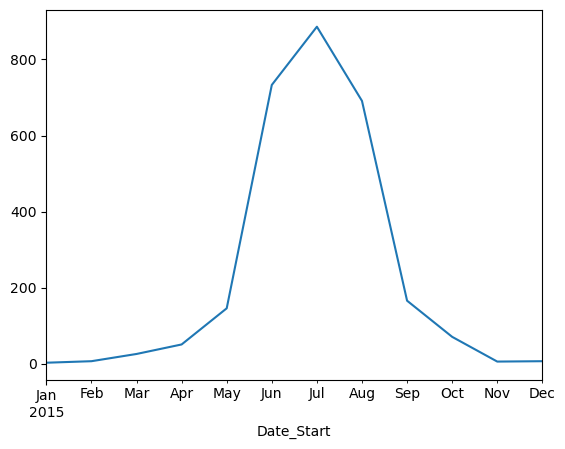

In [10]:
# plot the df column Acres on the chart
wildfires_by_month["ContrAcres"].plot()

# add code to show the chart


## Create an area chart

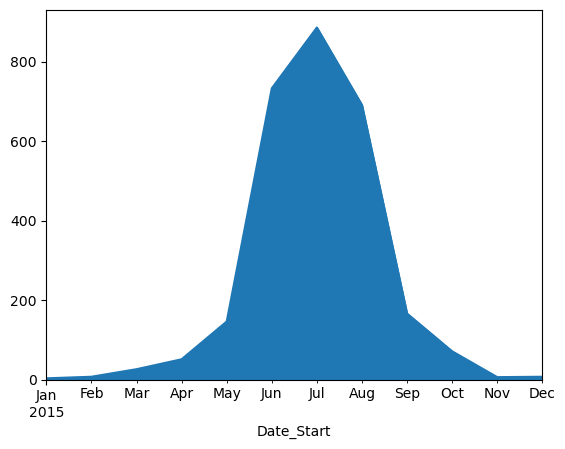

In [11]:
# plot acres as shaded area
wildfires_by_month["ContrAcres"].plot.area()
plt.show()

## Create a bar chart

<AxesSubplot: xlabel='State'>

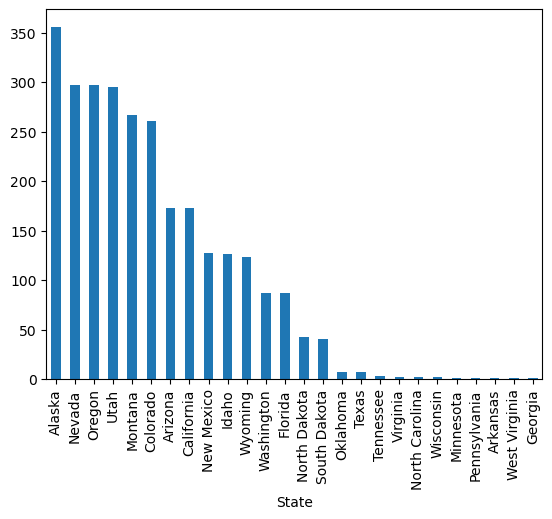

In [12]:
# plot frequency of fires in each state for a given year
wildfires_df.State.value_counts().plot(kind= "bar" )

## Create a scatter plot

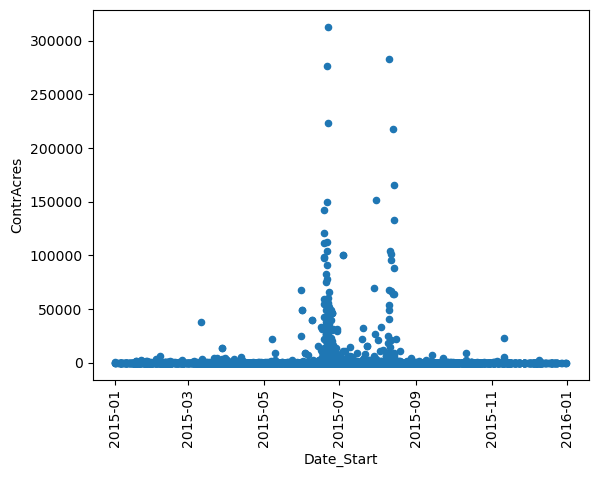

In [14]:
# create a scatter plot comparing acres burned to the fire start date
sedf.plot.scatter(x = "Date_Start", y = "ContrAcres") # add code for the x and y variables
plt.xticks(rotation='vertical')
plt.show()